# Time Series Analysis and FFT Exercises

## Exercise 1

Using ```numpy.random``` generate a random series of numbers $r_n$ between $[-1,1)$, with $n=1000$. We will consider this a _noisey_ time series with amplitude of 1.

Add the noise $r_n$ to the simple sine series $x_n$ from Example 1 of Lecture 8 and:
1. Calculate the power of the new time series $x_n + r_n$. Plot the power as a function of frequency $f$. How does it differ from the idealized example in Lecture 8?
1. Apply a window (of your choice) to the time series $x_n + r_n$ and re-calculate the power. Plot the power and the power from above in the same plot (with a legend). How do the two powers compare?
1. What happens if you change the amplitude of $x_n$ to 1 such that it is comprobable to the amplitude of the noise? And if you change the amplitude to 10? 

## Exercise 2

Double the length of $x_n+r_n$ by adding zeros to the end of the array. This is referred to as _zero padding_. What affect does it have on the FFT and power spectra of $x_n+r_n$?  


## Exercise 3

Spectral leackage occurs because a signal is not periodic in the window used to sample the signal and compute the FFT. This creates sharp transitions in the signal. Let's explore these transitions and investigate where the _leaked power_ comes from.

Create a step function where:
$$ x_n = 0 \quad \text{for } n = 0,^N/_2$$
$$ x_n = 1 \quad \text{for } n = ^N/_2+1,N-1$$
$$ N = 1024 $$

1. Calculate and plot the power spectra of $x_n$. Where does the majority of the power reside; high or low frequencies? 
1. As discussed in class the Fourier Transform decomposes a signal into sinusoids. From the Fourier Transform of $x_n$, individually generate the first 10 sinusoids $s_k$ used to decompose $x_n$. For instance $s_1$ would be generated by zero'ing every element of the FFT except $f_1$ and the corresponding negative frequency $f_N$ and then applying the inverse transform. Plot each of $s_n$ and $x_n$ on a single plot along with a legend. Can you see how the sinusoids are used to decompose the signal?
1. Add to the above plot the sum of each $s_n$, $s$: 
$$ s=\sum_{n=0}^{10}{s_n}$$

[Text(0,0.5,'Power')]

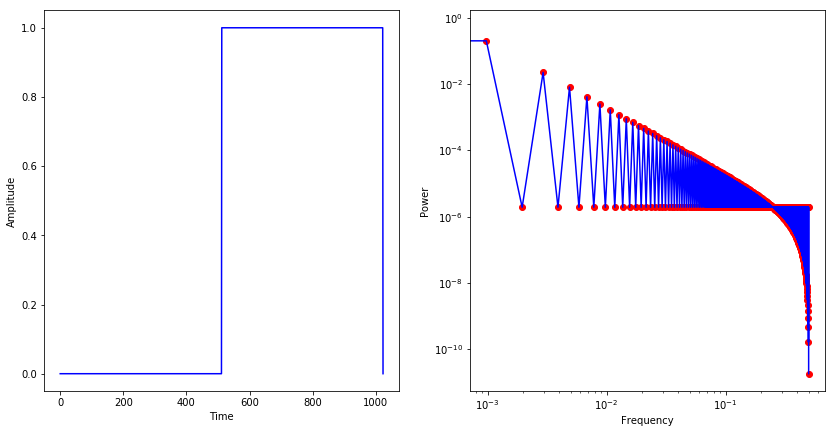

In [2]:
# Exercise 3
# Import numpy and matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import the FFT and inverse FFT
#  and a function which calculates
#  frequencies

from scipy.fftpack import fft, ifft, fftfreq

# Signal Length
n=1024
# Resolution
res=1

# Create an array for time
tw = np.arange(n)*res
# Create an array of frequencies
fw = fftfreq(n,d=res)
# sort the frequency array which goes 0-> fc -> -fc
# such that it goes -fc -> fc
# easier for plotting
fs = np.argsort(fw)

# Create a boxcar window and calculate power
step = np.zeros(n,dtype=np.float64)
step[n//2:n-1]  = 1
fftstep = fft(step)
pstep = (2./n**2)*abs(np.copy(fftstep[0:n//2]))**2.
fstep = fw[0:n//2]

# plot the windows and the frequency response of the windows (FFT)
f6, (wax1, wax2) = plt.subplots(1,2,figsize=(14,7) )

wax1.plot(tw,step, c='blue', label='Step')
wax1.set(xlabel='Time')
wax1.set(ylabel='Amplitude')


wax2.plot(fstep,pstep, c='blue', label='Step')
wax2.scatter(fstep,pstep, c='red', label='Step')
wax2.set(xscale='log',yscale='log')
wax2.set(xlabel='Frequency')
wax2.set(ylabel='Power')

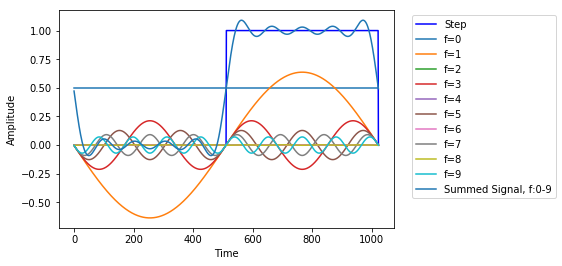

In [10]:
# Exercise 3 continued

# lets 'rebuild' the signal
f, wax1 = plt.subplots()

wax1.plot(tw,step, c='blue', label='Step')
wax1.set(xlabel='Time', ylabel='Amplitude')

s = np.zeros(n)


for i in np.arange(10):
    fft_c = np.copy(fftstep)
    fft_c[:] = 0
    #if we are doing the zero'th
    # or nyquist only consider one 
    # element
    if i==0 or i==n//2:
        fft_c[i]= fftstep[i]
    else:
        # any other frequency consider both elements
        fft_c[i] = fftstep[i]
        fft_c[n-i] = fftstep[n-i]
    
    #create a 'total' signal which 
    # is the sum of all others
    yi = ifft(fft_c)
    
    wax1.plot(tw,yi.real,label='f={0:d}'.format(i))
    s = s+yi.real
    
wax1.plot(tw,s, label='Summed Signal, f:0-{0:d}'.format(i))
wax1.legend(bbox_to_anchor=(1.04,1), loc="upper left")